In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import module as md
%matplotlib inline

import warnings
warnings.filterwarnings('ignore') 

In [34]:
medincome = pd.read_csv('E:/DATA SETS/US Police Shooting 2015/MedianHouseholdIncome2015.csv', encoding="windows-1252")
belowplevel = pd.read_csv('E:/DATA SETS/US Police Shooting 2015/PercentagePeopleBelowPovertyLevel.csv', encoding="windows-1252")
completedhs = pd.read_csv('E:/DATA SETS/US Police Shooting 2015/PercentOver25CompletedHighSchool.csv', encoding="windows-1252")
rcity = pd.read_csv('E:/DATA SETS/US Police Shooting 2015/ShareRaceByCity.csv', encoding="windows-1252")
kill = pd.read_csv('E:/DATA SETS/US Police Shooting 2015/PoliceKillingsUS.csv', encoding="windows-1252")

In [36]:
belowplevel['poverty_rate'] = belowplevel['poverty_rate'].replace('-', 0.0)

In [37]:
belowplevel['poverty_rate'] = belowplevel['poverty_rate'].astype(float)

In [38]:
md.summary(belowplevel, sample = True, n_sample = 10)

There are 3 columns and 29329 rows in the dataset

----------

Null values
There are no null values

----------

The columns and their datatypes are
Geographic Area     object
City                object
poverty_rate       float64
dtype: object


10 random data points


,Geographic Area,City,poverty_rate
26455,UT,Milford city,17.5
13116,MN,St. Paul city,22.3
6676,IL,Kampsville village,22.8
5252,GA,Enigma town,35.1
23319,SC,Antreville CDP,3.3
17091,NY,Delanson village,3.8
3806,CO,Redvale CDP,0.0
25498,TX,Malone town,17.1
7116,IL,Rockford city,24.8
18001,NY,Westvale CDP,6.8


Text(0.5, 1.0, 'Poverty Rate Given States')

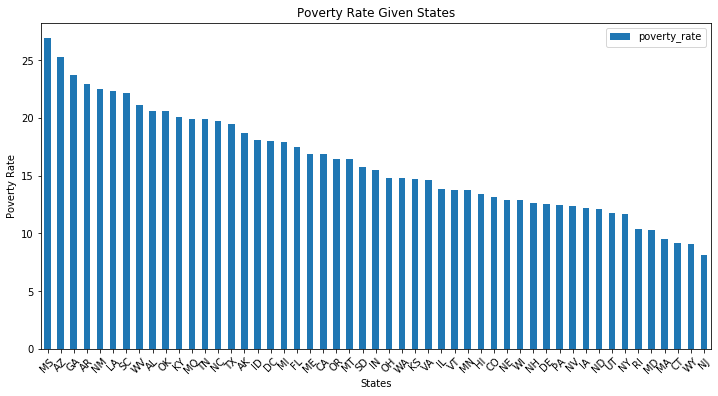

In [47]:
plt.figure
belowplevel.loc[:, ('Geographic Area', 'poverty_rate')].groupby('Geographic Area')['Geographic Area', 'poverty_rate'].mean().sort_values(by = 'poverty_rate', ascending = False).plot(kind = 'bar', figsize= (12, 6))
plt.xticks(rotation= 45)
plt.xlabel('States')
plt.ylabel('Poverty Rate')
plt.title('Poverty Rate Given States')

In [48]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [51]:
md.summary(kill)

There are 14 columns and 2535 rows in the dataset

----------

Null values
armed      9
age       77
race     195
flee      65
dtype: int64

----------

The columns and their datatypes are
id                                  int64
name                               object
date                       datetime64[ns]
manner_of_death                    object
armed                              object
age                               float64
gender                             object
race                               object
city                               object
state                              object
signs_of_mental_illness              bool
threat_level                       object
flee                               object
body_camera                          bool
dtype: object


First 5 data points


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-02-01,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-02-01,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-03-01,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-04-01,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-04-01,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [50]:
kill.date = pd.to_datetime(kill.date)

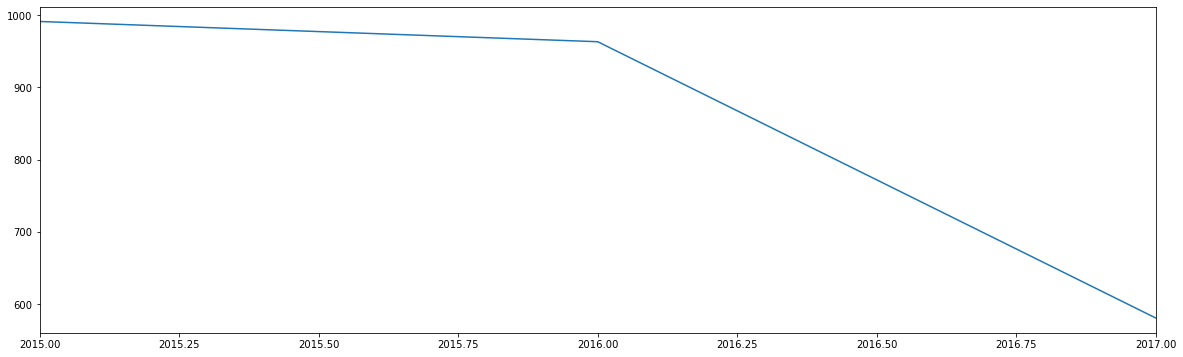

In [65]:
kill['date'].dt.year.value_counts().plot(figsize = (20, 6))